In [1]:
# !pip install squarify

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [3]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [4]:
df = pd.read_csv("../../../서울특별시_일반음식점.csv", encoding="cp949")

C:\Users\lth08\AppData\Local\Temp\ipykernel_14364\2358779018.py:1: DtypeWarning: Columns (22,27,39,41,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../../서울특별시_일반음식점.csv", encoding="cp949")


In [5]:
df.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총종업원수',
       '본사종업원수', '공장사무직종업원수', '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액',
       '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지',
       'Unnamed: 47'],
      dtype='object')

In [6]:
# 현재 필요 없는 컬럼 삭제
df.drop(columns=["Unnamed: 47",
                 "개방서비스아이디",
                 "개방자치단체코드",
                 "관리번호",
                 "인허가일자",
                 "인허가취소일자",
                 "상세영업상태코드",
                 "소재지전화",
                 "공장판매직종업원수",
                 "공장생산직종업원수",
                 "건물소유구분명",
                 "보증액",
                 "월세액",
                 "다중이용업소여부",
                 "시설총규모",
                 "전통업소지정번호",
                 "전통업소주된음식",
                 "홈페이지",
                 "남성종사자수",
                 "여성종사자수",
                 "영업장주변구분명",
                 "등급구분명",
                 "급수시설구분명",
                 "총종업원수",
                 "본사종업원수",
                 "공장사무직종업원수",
                 "소재지면적",
                 "최종수정시점",
                 "데이터갱신구분",
                 "데이터갱신일자",
                 "번호",
                 "도로명우편번호",
                 "소재지우편번호",
                 "개방서비스명"
                 ],inplace=True)

In [7]:
df.head()

,영업상태구분코드,영업상태명,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,좌표정보(x),좌표정보(y),위생업태명
0,1,영업/정상,영업,NaN,NaN,NaN,NaN,서울특별시 강서구 마곡동 757 두산더랜드파크 B동 207호,"서울특별시 강서구 마곡중앙로 161-8, 두산더랜드파크 B동 2층 207호 (마곡동)",혼밥대왕 마곡점,한식,NaN,NaN,한식
1,1,영업/정상,영업,NaN,NaN,NaN,NaN,서울특별시 강서구 화곡동 827-2 1층,"서울특별시 강서구 등촌로13다길 35, 1층 (화곡동)",꾸어가게생선구이화곡점,한식,187499.286366,448069.583478,한식
2,1,영업/정상,영업,NaN,NaN,NaN,NaN,서울특별시 강남구 역삼동 707-34 한신인터밸리24빌딩,"서울특별시 강남구 테헤란로 322, 한신인터밸리24빌딩 지하2층 B130호 (역삼동)",인생갈비탕,한식,204044.789949,444529.840427,한식
3,1,영업/정상,영업,NaN,NaN,NaN,NaN,서울특별시 강남구 대치동 896-28,"서울특별시 강남구 테헤란로68길 25, 지하1층 지하1호 (대치동)",놀부 공유주방 선릉역,한식,204603.136055,444606.621961,한식
4,1,영업/정상,영업,NaN,NaN,NaN,NaN,서울특별시 강남구 삼성동 159-7 현대백화점,"서울특별시 강남구 테헤란로 517, 현대백화점 지하1층 (삼성동)",온기정,일식,205210.358779,445154.422252,일식


In [8]:
# 폐업 후 재개업 하지 않은 음식점 삭제
df.drop(index=(df[(df["폐업일자"].notna()) & (df["재개업일자"].isnull())].index),inplace=True)

In [9]:
# 정상 영업하는 가게의 해당 컬럼들은 의미 없으므로 삭제
print(df["폐업일자"].notna().sum())
print(df["휴업시작일자"].notna().sum())
print(df["휴업종료일자"].notna().sum())
print(df["재개업일자"].notna().sum())
print(df[df["상세영업상태명"] != "영업"].shape[0])
print(df[df["영업상태명"] != "영업/정상"].shape[0])
df.drop(columns=["폐업일자","휴업시작일자","휴업종료일자","재개업일자","상세영업상태명","영업상태구분코드","영업상태명"],inplace=True)


0
0
0
0
0
0


In [10]:
# 사업자명이 null값이 아니면서 치킨이 포함되는 음식점이거나 업태구분명, 위생업태명에 통닭이 포함되는 업체만 출력
df = df[(df["사업장명"].notna()) & (df["사업장명"].str.contains("치킨")) | (df["업태구분명"].str.contains("통닭")) | (df["위생업태명"].str.contains("통닭"))].reset_index(drop=True)

In [11]:
# 도로명전체주소 컬럼에서 구를 추출
def find_address_gu(address):
    words = address.split()  # 공백 기준으로 나누기
    for word in words:
        if word.endswith('구'):  # "구"로 끝나면 전체 반환
            return word

def find_address_dong(address):
    words = address.split()
    for word in words:
        if word.endswith('가'):
            if word[-2].isdigit():
                return word
                
        elif word.endswith('동'): 
            return word
        
        elif '동' in word: 
                index = word.find('동')
                return word[:index + 1] 


In [12]:
# "구" 값 초기화
df["구"] = None

# 도로명전체주소에서 구 추출
df.loc[df['도로명전체주소'].notna(), "구"] = df.loc[df['도로명전체주소'].notna(), "도로명전체주소"].apply(find_address_gu)

# 소재지전체주소에서 구 추출 (도로명전체주소가 NaN인 경우만 업데이트)
df.loc[df['소재지전체주소'].notna() & df["구"].isna(), "구"] = df.loc[df['소재지전체주소'].notna(), "소재지전체주소"].apply(find_address_gu)


In [13]:
df

,소재지전체주소,도로명전체주소,사업장명,업태구분명,좌표정보(x),좌표정보(y),위생업태명,구
0,서울특별시 은평구 갈현동 400-9번지 (지하1층),"서울특별시 은평구 연서로29길 14-5, 지하1층 (갈현동)",청,호프/통닭,192757.634849,457444.483537,호프/통닭,은평구
1,서울특별시 영등포구 양평동3가 101번지 현대아파트 상가내 1층 102호,NaN,비에이치씨 양평현대점,호프/통닭,190517.880546,447739.172359,호프/통닭,영등포구
2,서울특별시 중구 필동2가 32-24번지 1층,"서울특별시 중구 퇴계로42길 12 (필동2가,1층)",짝퉁,호프/통닭,199627.907508,450994.67135,호프/통닭,중구
3,서울특별시 종로구 당주동 128-17번지 (지상1층),"서울특별시 종로구 새문안로3길 19 (당주동,(지상1층))",써브웨이 (광화문점),호프/통닭,197503.476882,452192.013262,호프/통닭,종로구
4,서울특별시 서초구 우면동 59번지 105호,NaN,교촌,호프/통닭,202014.977683,441020.098837,호프/통닭,서초구
...,...,...,...,...,...,...,...,...
14172,서울특별시 서대문구 남가좌동 382-9,"서울특별시 서대문구 가재울미래로 15, 더아무르 A동 1층 101호 (남가좌동)",BBQ 남가좌점,호프/통닭,192616.368927,452012.797296,호프/통닭,서대문구
14173,서울특별시 구로구 오류동 47-1 삼익쇼핑,"서울특별시 구로구 경인로 192, 삼익쇼핑 5층 (오류동)",치킨대통령,호프/통닭,186015.738370,443657.614265,호프/통닭,구로구
14174,서울특별시 관악구 신림동 246-30,"서울특별시 관악구 대학길 37, 지하1층 (신림동)",플레이걸,호프/통닭,194430.572823,440761.365621,호프/통닭,관악구
14175,서울특별시 중랑구 상봉동 268-36 1층,"서울특별시 중랑구 상봉중앙로1길 84, 1층 (상봉동)",지코바 상봉1호점,호프/통닭,207682.058820,455301.563247,호프/통닭,중랑구


In [14]:
df[df["구"].notna()]["구"].unique()

array(['은평구', '영등포구', '중구', '종로구', '서초구', '성북구', '서대문구', '송파구', '양천구',
       '관악구', '광진구', '마포구', '강서구', '구로구', '금천구', '강북구', '강동구', '노원구',
       '성동구', '동작구', '중랑구', '강남구', '용산구', '도봉구', '동대문구'], dtype=object)

In [15]:
df[df["구"].isna()]

,소재지전체주소,도로명전체주소,사업장명,업태구분명,좌표정보(x),좌표정보(y),위생업태명,구


In [16]:
df["동"] = df[(df["구"] == ("서대문구")) & (df["소재지전체주소"].notna())]["소재지전체주소"].apply(find_address_dong)

In [17]:
df.loc[(df["구"] == "서대문구") & (df["동"].str.contains("충정로")), "동"] = "충정로가"

In [18]:
df[(df["구"] == "서대문구") & (df["동"].notna())]["동"].unique()

array(['창천동', '홍제동', '남가좌동', '연희동', '북가좌동', '북아현동', '충정로가', '홍은동', '냉천동',
       '옥천동', '대현동', '미근동', '대신동', '천연동', '영천동', '합동'], dtype=object)

In [19]:
df[(df["구"] == "서대문구") & (df["동"].isna())]

,소재지전체주소,도로명전체주소,사업장명,업태구분명,좌표정보(x),좌표정보(y),위생업태명,구,동


In [20]:
graph_data = df[df["구"] == "서대문구"]["동"].value_counts().reset_index()
graph_data

,동,count
0,창천동,99
1,홍제동,61
2,북가좌동,53
3,남가좌동,52
4,홍은동,51
5,연희동,45
6,북아현동,24
7,충정로가,22
8,대현동,19
9,냉천동,12


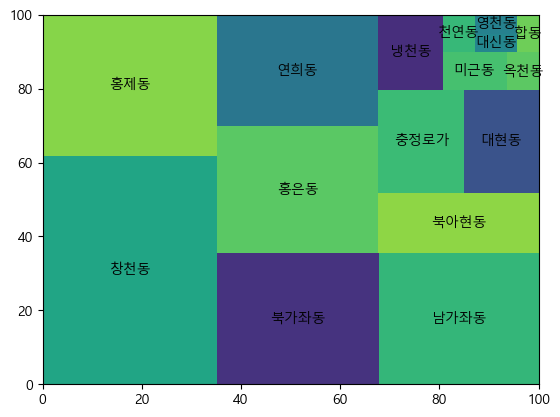

In [21]:
plt.figure()
squarify.plot(sizes=graph_data["count"], label=graph_data["동"])
plt.show()